<a href="https://colab.research.google.com/github/deepakbharadwaj99/deepakbharadwaj99/blob/main/Sales_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR
import torch
import torch.nn as nn

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: xlabel='Sales', ylabel='Count'>

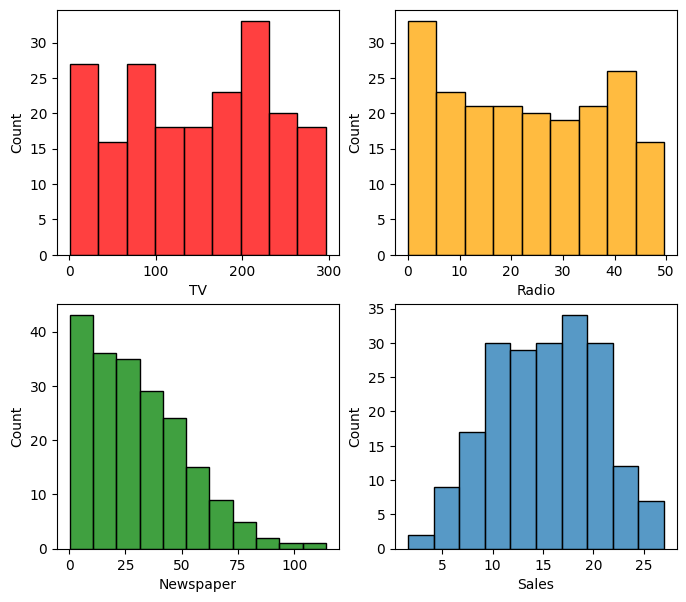

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (8,7))
sns.histplot(df, x = 'TV', ax = axes[0,0], color = 'red')
sns.histplot(df, x = 'Radio', ax = axes[0,1], color = 'orange')
sns.histplot(df, x = 'Newspaper', ax = axes[1,0], color = 'green')
sns.histplot(df, x = 'Sales', ax = axes[1,1])

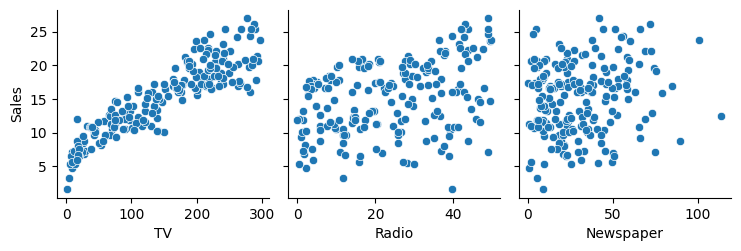

In [ ]:
sns.pairplot(data = df, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars= 'Sales', kind = 'scatter')

<Axes: >

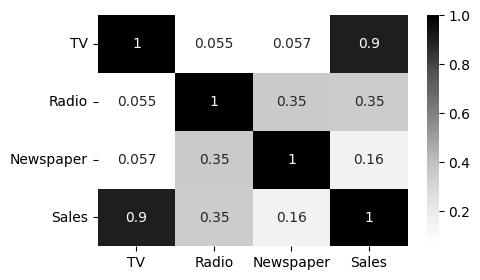

In [ ]:
plt.figure(figsize = (5,3))
sns.heatmap(df.corr(), annot= True, cmap = 'Greys')

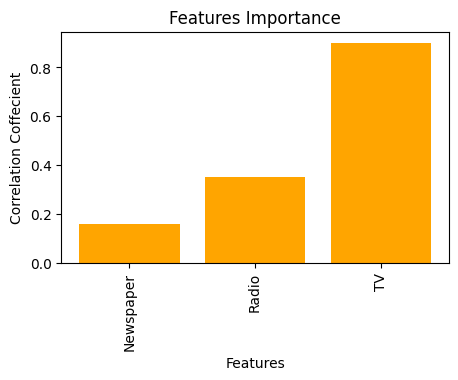

In [ ]:
correlation = df.corr()["Sales"].drop("Sales")
sorted_features = correlation.sort_values(ascending= True)
plt.figure(figsize=(5,3))
plt.bar(sorted_features.index, sorted_features.values, color='orange')
plt.xlabel("Features")
plt.ylabel("Correlation Coffecient")
plt.title("Features Importance")
plt.xticks(rotation = 90)
plt.show()

From the above visual it is clear that TV advertising is highly correlated to Sales.

In [ ]:
# copying data for training, testing and predicting
data = df.copy(deep = True)

In [ ]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [ ]:
#splitting the data into features and labels
x = data.drop(["Sales"], axis= 1) # dropping the variable Outcome
y = data["Sales"]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
#splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

# Models testing and comparing

In [ ]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root mean squared error:{np.sqrt(mse)}')
print(f'R-squared: {r2}')
print(f'Mean absolute error: {mae}')


Mean Squared Error: 2.370659971225658
Root mean squared error:1.5396947656031237
R-squared: 0.9071151423684273
Mean absolute error: 1.194741713405674


In [ ]:
# Decision Tree Algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root mean squared error:{np.sqrt(mse)}')
print(f'R-squared: {r2}')
print(f'Mean absolute error: {mae}')

Mean Squared Error: 1.9824999999999997
Root mean squared error:1.4080127840328722
R-squared: 0.9223236429982878
Mean absolute error: 1.0049999999999997


In [ ]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root mean squared error:{np.sqrt(mse)}')
print(f'R-squared: {r2}')
print(f'Mean absolute error: {mae}')

Mean Squared Error: 0.9633129666666679
Root mean squared error:0.9814850822435702
R-squared: 0.9622564227474509
Mean absolute error: 0.7689999999999984


In [ ]:
# Scaler Vector Machine Algorithm
svm = SVR()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root mean squared error:{np.sqrt(mse)}')
print(f'R-squared: {r2}')
print(f'Mean absolute error: {mae}')

Mean Squared Error: 3.10100153708118
Root mean squared error:1.7609660806163132
R-squared: 0.8784996204503526
Mean absolute error: 1.39669180347963


In [ ]:
# lasso algorithm
las = Lasso()
las.fit(x_train, y_train)

y_pred = las.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root mean squared error:{np.sqrt(mse)}')
print(f'R-squared: {r2}')
print(f'Mean absolute error: {mae}')

Mean Squared Error: 2.399512545671173
Root mean squared error:1.5490360052856011
R-squared: 0.9059846692924887
Mean absolute error: 1.2115022009053553


Conclusion from models:
1. Mean Squared Error - Lowest in RandomForestRegressor : Indicating the Magnitude of error the model is making.
2. Mean absolute Error - Lowest in RandomForestRegressor
3. Root mean squared error - Lowest in RandomForestRegressor: Indicating Magnitude of error
4. R-Squared - Highest in RandomForestRegressor : Indicating goodness of fit of the model


Hence, RandomForestRegressor model gives better prediction results.

